In [57]:
import pandas as pd
import numpy as np

In [7]:
all_data = pd.read_csv('../Data/all_data.csv', delimiter = ",")

In [8]:
#all_data["State"].unique()
#all_data.head(50)
#all_data.tail(50)

In [13]:
columns = list(all_data.columns)
columns

['Candidate Name',
 'Affiliation',
 'Incumbent',
 'Percentage of Vote',
 'Winner',
 'State',
 'District',
 'Money Raised',
 'Money Spent']

In [20]:
all_data['Affiliation'].unique()

array(['R', 'D', 'I', '3', 'L'], dtype=object)

In [93]:
all_data[all_data['Winner']==True].groupby("Money Raised")[['State','District','Affiliation']].value_counts(ascending=True).tail(20)

Money Raised  State       District  Affiliation
7414403.0     New Jersey  7         D              1
7678363.0     California  53        D              1
7694027.0     New Jersey  5         D              1
7803579.0     Illinois    14        D              1
8387680.0     Virginia    7         D              1
8396981.0     New York    1         R              1
8507298.0     Georgia     6         D              1
8967420.0     Michigan    8         D              1
9962507.0     California  25        R              1
11239670.0    California  50        R              1
13287248.0    New York    21        R              1
16627706.0    California  45        D              1
18313823.0    Ohio        4         R              1
19382855.0    California  28        D              1
19427865.0    Texas       2         R              1
20664795.0    New York    14        D              1
26825212.0    California  22        R              1
27359508.0    California  12        D              

In [94]:
states_list = ['New Jersey', 'California','Illinois','Virginia','New York','Georgia','Michigan','Ohio','Texas','Louisiana']

In [107]:
selected_states_data = all_data[all_data["State"].isin(states_list)]

In [113]:
table = pd.pivot_table(
    selected_states_data, values = ["Money Raised"], 
    index = ["State"], 
    columns= ["Winner"],aggfunc=np.mean, 
    fill_value= np.mean(all_data["Money Raised"])    
    )

In [109]:
table.head()

Money Raised              
Winner                                  False         True 
State      District Affiliation                            
California 1        D            2.461769e+06  1.869724e+06
                    R            1.869724e+06  1.219556e+06
           2        D            1.869724e+06  8.994190e+05
                    R            5.921000e+03  1.869724e+06
           3        D            1.869724e+06  1.054066e+06

<Axes: xlabel='State'>

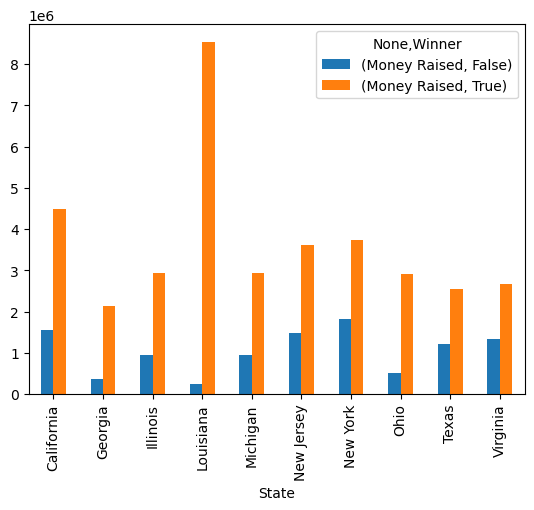

In [114]:
table.plot(kind='bar')

In [116]:
Louisiana_data = all_data[all_data["State"]=='Louisiana']

In [119]:
table = pd.pivot_table(
    Louisiana_data, values = ["Money Raised",'Money Spent'], 
    index = ["State",'District'], 
    columns= ["Winner"],aggfunc=np.mean, 
    fill_value= np.mean(all_data["Money Raised"])    
    )

<Axes: xlabel='State,District'>

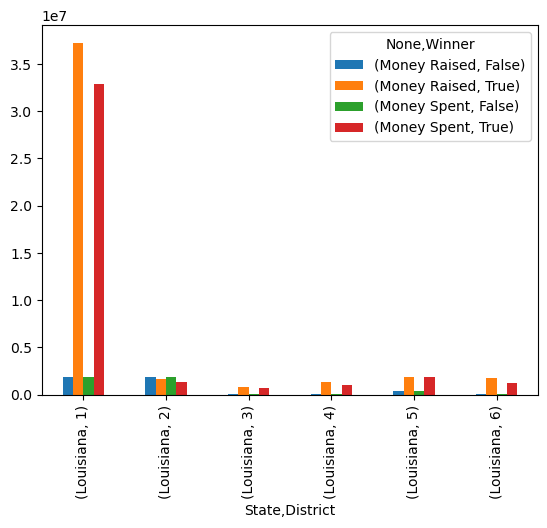

In [120]:
table.plot(kind='bar')